# Mini-Projeto 2: Teste AB
### Gianluca Fornicola, Pedro Garcia e Thiago Carletti

Neste teste AB será considerado o seguinte teste de hipótese
- Ho: é mais fácil navegar na página 'A', portanto a média do tempo necessário para o usuário achar o projeto Jogo da Velha será menor na página 'A' do que na página 'B'; ou seja, Ua<Ub.
- Ha: é mais fácil de navegar na página 'B' do que na página 'A', portanto Ub<Ua.

Assim teremos os tipos  de erros dados por:
- Erro do  tipo 1: Ho é verdadeira, mas é recusada; ou seja, é considerado que a página 'B' é melhor sendo que na realidade a página 'A' é a melhor.
- Erro do tipo 2: Ho é falsa, mas é aceita; ou seja, considera-se que a página 'A' é melhor enquanto, na realidade, é a página 'B'.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

In [3]:
dados = pd.read_json('coleta_dados.json')
dados['logs'].size

296

In [4]:
# separando os dados das versões A e B
listaA = []
listaB = []
for i in range(296):
    if dados['logs'][i]['versao'] == "A":
        listaA.append(dados['logs'][i])
    elif dados['logs'][i]['versao'] == "B":
        listaB.append(dados['logs'][i])

        


In [5]:
# Dados relativos aos tempos final e inicial separados (versão A)
finais_A = []
iniciais_A = []
for i in range(len(listaA)):
    if listaA[i]['tipo'] == 'inicio':
        iniciais_A.append(listaA[i]['tempo'])
    elif listaA[i]['tipo'] == 'final':
        finais_A.append(listaA[i]['tempo'])


In [6]:
len(finais_A)

58

In [7]:
# filtragem da lista A, ha mais tempos iniciais (pessoas não terminavam a tarefa designada)
A = iniciais_A[0:58]
len(A)

58

In [8]:
# Dados relativos aos tempos final e inicial separados (versão B)
finais_B = []
iniciais_B = []
for i in range(len(listaB)):
    if listaB[i]['tipo'] == 'inicio':
        iniciais_B.append(listaA[i]['tempo'])
    elif listaB[i]['tipo'] == 'final':
        finais_B.append(listaA[i]['tempo'])
        

In [9]:
len(finais_B)

48

In [10]:
# filtragem da lista B, ha mais tempos iniciais (pessoas não terminavam a tarefa designada)
B = iniciais_B[0:48]
len(B)

48

In [11]:
# funçao que calcula o delta T entre as listas
def delta(final,inicial):
    lista = []
    for i in range(len(final)):
        lista.append(final[i]-inicial[i])
    return(lista)

tempos_A = delta(finais_A,A)
tempos_B = delta(finais_B,B)

In [12]:
Azones = pd.Series(tempos_A)
Bzones = pd.Series(tempos_B)

In [13]:
# média de tempo necessário para realizar a tarefa na versão A do site
Azones.mean()

434118196.4310345

In [14]:
# média de tempo necessário para realizar a tarefa na versão B do site
Bzones.mean()

701138696.0208334

In [15]:
# desvio padrão do tempo necessário para realizar a tarefa designada na versão A
Azones.std()

502956491.8885641

In [16]:
# desvio padrão do tempo necessário para realizar a tarefa designada na versão B
Bzones.std()

473115435.31392235

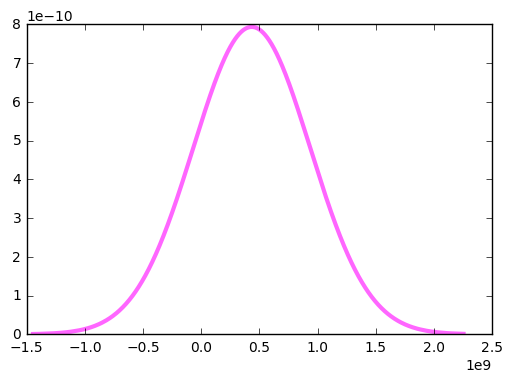

In [17]:
# plot da normal da média de tempo necessária para realizar a tarefa designada na versão A
a = Azones.mean()
b = Azones.std()
x=sorted(stats.norm.rvs(size=10000, loc=a, scale=b))
plt.plot(x, stats.norm.pdf(x, a, b), lw=3, alpha=0.6, color='magenta')

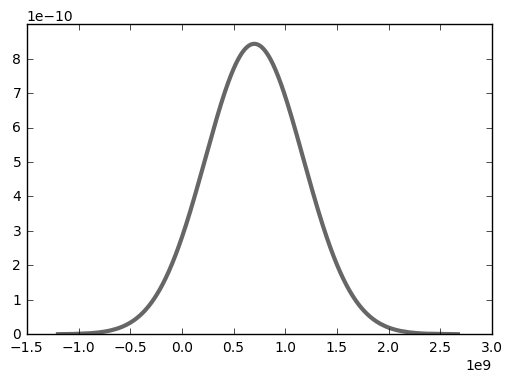

In [18]:
# plot da normal da média de tempo necessária para realizar a tarefa designada na versão B
c = Bzones.mean()
d = Bzones.std()
x=sorted(stats.norm.rvs(size=10000, loc=c, scale=d))
plt.plot(x, stats.norm.pdf(x, c, d), lw=3, alpha=0.6, color='black')

#### Portanto temos que Ho é verdadeira.